# Python Article Libary

In [32]:
pip install newspaper3k


Note: you may need to restart the kernel to use updated packages.


In [33]:
from newspaper import Article


In [34]:
url = 'https://mystudentvoices.com/it-took-me-2-years-to-get-1000-followers-life-lessons-ive-learned-throughout-the-journey-9bc44f2959f0'

In [35]:
article = Article(url)


Download article

In [36]:
article.download()


Find the publish date

In [37]:
article.publish_date


''

In [38]:
article.parse()


In [39]:
text = article.text

In [40]:
image_url = article.top_image



Take a look at the image

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url=image_url)



In [42]:
article.authors

['William Cho']

In [43]:
article.nlp()


In [44]:
article.keywords


['soon',
 'ive',
 'work',
 'journey',
 '1000',
 'took',
 'followers',
 'started',
 'truth',
 'life',
 'writing',
 'wasnt',
 'lessons',
 'doing',
 'read',
 'maybe',
 'learned',
 'youre']

In [45]:
article.summary


'But I’ve only been writing on Medium for a total of maybe 4.5 months.\nI started writing passionately, and you could tell from my writing that I thought I was enlightened and speaking from authority.\nI’ve noticed that it comes in moments where I put in effort to improve myself — working out, writing, and reading.\nYou’re just doing it to put yourself on a higher ground than your friends, to judge them from a higher platform and deem everything you’re doing more virtuous than what they’re doing.\nI would sidestep and avoid the truth — the truth that would hurt but ultimately set me free.'

# NLTK for Text Processing

In [46]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [47]:
import nltk


In [48]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Remove punctuation

In [49]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
text = tokenizer.tokenize(text)

text = ' '.join(word for word in text)


Tokenize words

In [50]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)


Lowercase

In [51]:
tokenized_word = [word.lower() for word in tokenized_word]

Remove stopwords

In [52]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)


{'t', 'under', 'will', "should've", 'such', 'has', 'other', 'do', 'shan', 'was', 'his', "wouldn't", 'he', 'if', 'ours', 'did', 'which', 'my', 'had', 'after', 'through', 'off', 'the', 'most', 'o', 'aren', 'when', 'into', 'being', 'her', 'each', 'this', 'been', 'about', 'until', 'won', 'what', 'be', 'ourselves', 'doesn', 'they', 'hers', 'am', "it's", 'i', 'down', 'y', 'have', 'who', 'their', 'any', 'with', 'both', 'because', 'from', 'before', 'or', 'hasn', 'haven', 'doing', 'few', 'don', "shouldn't", 'for', 'ain', 'by', 'having', 'some', 'our', 'm', 'no', 'weren', 'yourself', 've', 'there', 'were', "you'll", 's', 'should', "won't", 'over', 'against', 'to', "wasn't", "aren't", 'on', 'him', 'are', "mightn't", 'as', "hadn't", 'how', 'you', 'it', "shan't", 'hadn', 'and', 'than', 'that', "couldn't", 'where', 'then', 'its', 'whom', 'below', 'here', "hasn't", 'all', "didn't", "isn't", 'wasn', 'an', 'yourselves', 'again', "don't", 'why', 'theirs', 'up', 'couldn', 'just', 'can', "doesn't", 'so', 

In [53]:
filtered_word = []
for word in tokenized_word:
  if word not in stop_words:
    filtered_word.append(word)
    

Stemming the word

In [54]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []
for w in filtered_word:
  stemmed_words.append(ps.stem(w))

#See how stemming works
for word in ['thinking', 'felt', 'asked','challenging','devoted']:
    print(ps.stem(word))


think
felt
ask
challeng
devot


Try with lemmatization and compare it with stemming

In [55]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()


In [56]:
lem_words = []
for w in filtered_word:
  lem_words.append(lem.lemmatize(w,'v'))
  

In [57]:
for word in ['thinking', 'felt', 'asked','challenging','devoted']:
    print(lem.lemmatize(word,'v'))


think
felt
ask
challenge
devote


In [58]:
from nltk.probability import FreqDist
fdist = FreqDist(lem_words)


In [59]:
most_common = fdist.most_common(20)
most_common


[('write', 26),
 ('read', 11),
 ('maybe', 8),
 ('start', 8),
 ('one', 7),
 ('work', 7),
 ('know', 6),
 ('soon', 6),
 ('time', 6),
 ('think', 6),
 ('doubt', 6),
 ('would', 6),
 ('medium', 5),
 ('make', 5),
 ('truth', 5),
 ('day', 4),
 ('everyday', 4),
 ('keep', 4),
 ('could', 4),
 ('fail', 4)]

In [60]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [61]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Frequency')

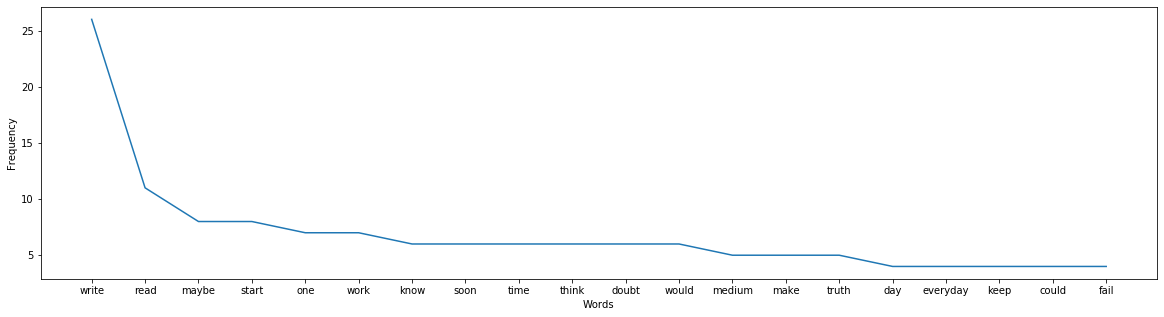

In [62]:
plt.figure(figsize=(20,5))
plt.plot([word[0] for word in most_common], [word[1] for word in most_common])
plt.xlabel('Words')
plt.ylabel('Frequency')
